In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist        # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩용
from tensorflow.keras.models import Sequential     # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt               # 학습과정 loss, accuracy 보기
np.random.seed(4)

In [6]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [13]:
print(data[0].shape)
print(data[0, 0])
print(data[0, 1:].reshape(28, 28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.

In [14]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [15]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

5.0

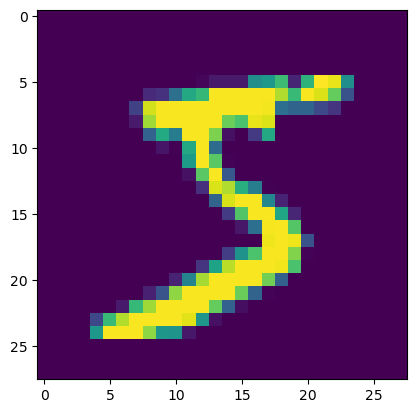

In [16]:
plt.imshow(data[0,1:].reshape(28,-1))
data[0,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

# 1. 데이터 생성 & 전처리

In [17]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

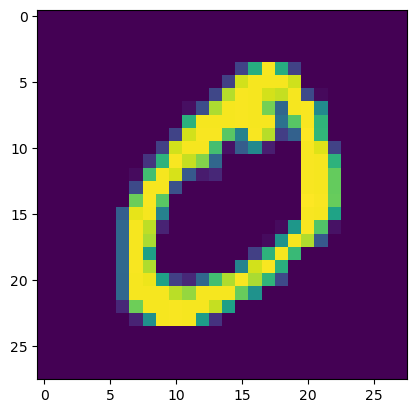

In [19]:
plt.plot(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [20]:
Y_train[1]

0

In [21]:
# 훈련섹(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
# 검증셋을(만개) 하기위해 X_train, Y_train 을 다시 재정의
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [23]:
# 훈련시(학습시 사용), 검증셋(fit에서 사용), 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [24]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나누기)
# 두 번 실행 X
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [29]:
# 훈련셋(5만)과 검증셋(1만) -> 700개, 300개만 random으로 choice
# random.choice([1, 2, 3])  # list에서 한 개를 choice
train_idxs = np.random.choice(50000, 700)  # 0부터 500미만의 무작위 수 3개
val_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

6


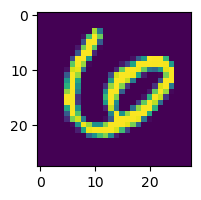

In [33]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0].reshape(-1, 28))
print(Y_train[0])
plt.show()

In [34]:
# 종속변수 전처리 : 원핫인코딩(to_categorical(넘파이배열을 반환), pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape : ', Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)
print('원핫인코딩 후 shape : ', Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape :  (700,) (300,) (10000,)
원핫인코딩 후 shape :  (700, 10) (300, 10) (10000, 10)


In [35]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


# 2. 모델 구성하기

In [36]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 모델 학습과정 설정

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습

In [38]:
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                 validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 43ms/step - loss: 2.3060 - accuracy: 0.1114 - val_loss: 2.2842 - val_accuracy: 0.0800
Epoch 2/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2843 - accuracy: 0.1414 - val_loss: 2.2659 - val_accuracy: 0.1067
Epoch 3/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2560 - accuracy: 0.1729 - val_loss: 2.2308 - val_accuracy: 0.1767
Epoch 4/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2137 - accuracy: 0.2029 - val_loss: 2.1854 - val_accuracy: 0.2133
Epoch 5/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1735 - accuracy: 0.2114 - val_loss: 2.1530 - val_accuracy: 0.2167
Epoch 6/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1406 - accuracy: 0.2243 - val_loss: 2.1277 - val_accuracy: 0.2233
Epoch 7/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1136 - accuracy: 0.2314 - val_loss: 2.1075 - val_accuracy: 0.2267
Epoch 8/1200
7/7 [=

7/7 [==============================] - 0s 6ms/step - loss: 1.5946 - accuracy: 0.3571 - val_loss: 1.7358 - val_accuracy: 0.3267
Epoch 60/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5883 - accuracy: 0.3543 - val_loss: 1.7297 - val_accuracy: 0.3300
Epoch 61/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5819 - accuracy: 0.3500 - val_loss: 1.7281 - val_accuracy: 0.3300
Epoch 62/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5761 - accuracy: 0.3514 - val_loss: 1.7188 - val_accuracy: 0.3333
Epoch 63/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5695 - accuracy: 0.3514 - val_loss: 1.7178 - val_accuracy: 0.3433
Epoch 64/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5636 - accuracy: 0.3600 - val_loss: 1.7102 - val_accuracy: 0.3400
Epoch 65/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5568 - accuracy: 0.3600 - val_loss: 1.7108 - val_accuracy: 0.3433
Epoch 66/1200
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.2908 - accuracy: 0.5043 - val_loss: 1.5679 - val_accuracy: 0.4133
Epoch 118/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2868 - accuracy: 0.5100 - val_loss: 1.5616 - val_accuracy: 0.4100
Epoch 119/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2823 - accuracy: 0.5043 - val_loss: 1.5644 - val_accuracy: 0.4133
Epoch 120/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2789 - accuracy: 0.5100 - val_loss: 1.5632 - val_accuracy: 0.4133
Epoch 121/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.2755 - accuracy: 0.5029 - val_loss: 1.5633 - val_accuracy: 0.4200
Epoch 122/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.2717 - accuracy: 0.5043 - val_loss: 1.5601 - val_accuracy: 0.4133
Epoch 123/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2663 - accuracy: 0.5129 - val_loss: 1.5608 - val_accuracy: 0.4167
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.1106 - accuracy: 0.6286 - val_loss: 1.5543 - val_accuracy: 0.5100
Epoch 176/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1082 - accuracy: 0.6343 - val_loss: 1.5644 - val_accuracy: 0.5200
Epoch 177/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1063 - accuracy: 0.6300 - val_loss: 1.5618 - val_accuracy: 0.5100
Epoch 178/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1031 - accuracy: 0.6300 - val_loss: 1.5597 - val_accuracy: 0.5167
Epoch 179/1200
7/7 [==============================] - 0s 5ms/step - loss: 1.1014 - accuracy: 0.6357 - val_loss: 1.5634 - val_accuracy: 0.5100
Epoch 180/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.0990 - accuracy: 0.6371 - val_loss: 1.5620 - val_accuracy: 0.5167
Epoch 181/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.0960 - accuracy: 0.6371 - val_loss: 1.5627 - val_accuracy: 0.5200
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 0.9855 - accuracy: 0.7129 - val_loss: 1.6185 - val_accuracy: 0.5433
Epoch 233/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9849 - accuracy: 0.7114 - val_loss: 1.6215 - val_accuracy: 0.5467
Epoch 234/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9818 - accuracy: 0.7143 - val_loss: 1.6207 - val_accuracy: 0.5433
Epoch 235/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9797 - accuracy: 0.7157 - val_loss: 1.6225 - val_accuracy: 0.5433
Epoch 236/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9779 - accuracy: 0.7143 - val_loss: 1.6214 - val_accuracy: 0.5433
Epoch 237/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9761 - accuracy: 0.7214 - val_loss: 1.6285 - val_accuracy: 0.5467
Epoch 238/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9748 - accuracy: 0.7200 - val_loss: 1.6251 - val_accuracy: 0.5433
Epoch 239/1200
7/7 [=

Epoch 290/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8875 - accuracy: 0.7500 - val_loss: 1.7103 - val_accuracy: 0.5567
Epoch 291/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8863 - accuracy: 0.7471 - val_loss: 1.7088 - val_accuracy: 0.5567
Epoch 292/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8854 - accuracy: 0.7500 - val_loss: 1.7119 - val_accuracy: 0.5600
Epoch 293/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8836 - accuracy: 0.7500 - val_loss: 1.7133 - val_accuracy: 0.5567
Epoch 294/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8824 - accuracy: 0.7500 - val_loss: 1.7166 - val_accuracy: 0.5567
Epoch 295/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8813 - accuracy: 0.7443 - val_loss: 1.7168 - val_accuracy: 0.5533
Epoch 296/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.8790 - accuracy: 0.7514 - val_loss: 1.7196 - val_accuracy: 0.5567
Epoch 

Epoch 348/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8098 - accuracy: 0.7786 - val_loss: 1.8199 - val_accuracy: 0.5667
Epoch 349/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8099 - accuracy: 0.7843 - val_loss: 1.8224 - val_accuracy: 0.5667
Epoch 350/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8082 - accuracy: 0.7771 - val_loss: 1.8220 - val_accuracy: 0.5700
Epoch 351/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8069 - accuracy: 0.7829 - val_loss: 1.8245 - val_accuracy: 0.5667
Epoch 352/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8052 - accuracy: 0.7814 - val_loss: 1.8252 - val_accuracy: 0.5633
Epoch 353/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8040 - accuracy: 0.7829 - val_loss: 1.8287 - val_accuracy: 0.5600
Epoch 354/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8033 - accuracy: 0.7814 - val_loss: 1.8344 - val_accuracy: 0.5633
Epoch 

Epoch 406/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7473 - accuracy: 0.8000 - val_loss: 1.9407 - val_accuracy: 0.5500
Epoch 407/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7463 - accuracy: 0.7986 - val_loss: 1.9450 - val_accuracy: 0.5500
Epoch 408/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7457 - accuracy: 0.7971 - val_loss: 1.9491 - val_accuracy: 0.5500
Epoch 409/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7440 - accuracy: 0.7986 - val_loss: 1.9501 - val_accuracy: 0.5467
Epoch 410/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7427 - accuracy: 0.7986 - val_loss: 1.9528 - val_accuracy: 0.5500
Epoch 411/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7419 - accuracy: 0.7957 - val_loss: 1.9558 - val_accuracy: 0.5533
Epoch 412/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7410 - accuracy: 0.8029 - val_loss: 1.9581 - val_accuracy: 0.5467
Epoch 

Epoch 464/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.8114 - val_loss: 2.0802 - val_accuracy: 0.5367
Epoch 465/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6919 - accuracy: 0.8129 - val_loss: 2.0834 - val_accuracy: 0.5367
Epoch 466/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.8171 - val_loss: 2.0828 - val_accuracy: 0.5367
Epoch 467/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.8143 - val_loss: 2.0841 - val_accuracy: 0.5333
Epoch 468/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6891 - accuracy: 0.8143 - val_loss: 2.0845 - val_accuracy: 0.5400
Epoch 469/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6884 - accuracy: 0.8143 - val_loss: 2.0907 - val_accuracy: 0.5367
Epoch 470/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6876 - accuracy: 0.8157 - val_loss: 2.0898 - val_accuracy: 0.5367
Epoch 

Epoch 522/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.8229 - val_loss: 2.2227 - val_accuracy: 0.5400
Epoch 523/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6445 - accuracy: 0.8229 - val_loss: 2.2257 - val_accuracy: 0.5467
Epoch 524/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6434 - accuracy: 0.8229 - val_loss: 2.2284 - val_accuracy: 0.5400
Epoch 525/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6430 - accuracy: 0.8229 - val_loss: 2.2301 - val_accuracy: 0.5433
Epoch 526/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6422 - accuracy: 0.8243 - val_loss: 2.2378 - val_accuracy: 0.5433
Epoch 527/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6412 - accuracy: 0.8271 - val_loss: 2.2372 - val_accuracy: 0.5400
Epoch 528/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6408 - accuracy: 0.8257 - val_loss: 2.2362 - val_accuracy: 0.5433
Epoch 

7/7 [==============================] - 0s 7ms/step - loss: 0.6046 - accuracy: 0.8343 - val_loss: 2.3721 - val_accuracy: 0.5467
Epoch 580/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6037 - accuracy: 0.8357 - val_loss: 2.3735 - val_accuracy: 0.5467
Epoch 581/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6031 - accuracy: 0.8357 - val_loss: 2.3730 - val_accuracy: 0.5467
Epoch 582/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6024 - accuracy: 0.8357 - val_loss: 2.3787 - val_accuracy: 0.5467
Epoch 583/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6021 - accuracy: 0.8343 - val_loss: 2.3805 - val_accuracy: 0.5467
Epoch 584/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.8371 - val_loss: 2.3857 - val_accuracy: 0.5467
Epoch 585/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6010 - accuracy: 0.8357 - val_loss: 2.3855 - val_accuracy: 0.5500
Epoch 586/1200
7/7 [=

Epoch 637/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5676 - accuracy: 0.8414 - val_loss: 2.5174 - val_accuracy: 0.5433
Epoch 638/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5672 - accuracy: 0.8400 - val_loss: 2.5203 - val_accuracy: 0.5467
Epoch 639/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5670 - accuracy: 0.8414 - val_loss: 2.5190 - val_accuracy: 0.5467
Epoch 640/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5663 - accuracy: 0.8400 - val_loss: 2.5247 - val_accuracy: 0.5467
Epoch 641/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5657 - accuracy: 0.8386 - val_loss: 2.5274 - val_accuracy: 0.5467
Epoch 642/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 0.8414 - val_loss: 2.5303 - val_accuracy: 0.5467
Epoch 643/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5645 - accuracy: 0.8400 - val_loss: 2.5370 - val_accuracy: 0.5467
Epoch 

Epoch 695/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5345 - accuracy: 0.8457 - val_loss: 2.6720 - val_accuracy: 0.5467
Epoch 696/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5341 - accuracy: 0.8443 - val_loss: 2.6731 - val_accuracy: 0.5467
Epoch 697/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5336 - accuracy: 0.8443 - val_loss: 2.6785 - val_accuracy: 0.5467
Epoch 698/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5331 - accuracy: 0.8471 - val_loss: 2.6796 - val_accuracy: 0.5467
Epoch 699/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5329 - accuracy: 0.8486 - val_loss: 2.6828 - val_accuracy: 0.5400
Epoch 700/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5324 - accuracy: 0.8500 - val_loss: 2.6824 - val_accuracy: 0.5433
Epoch 701/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5316 - accuracy: 0.8457 - val_loss: 2.6869 - val_accuracy: 0.5433
Epoch 

Epoch 753/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5049 - accuracy: 0.8557 - val_loss: 2.8293 - val_accuracy: 0.5367
Epoch 754/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.5047 - accuracy: 0.8571 - val_loss: 2.8314 - val_accuracy: 0.5333
Epoch 755/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5041 - accuracy: 0.8557 - val_loss: 2.8420 - val_accuracy: 0.5333
Epoch 756/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5037 - accuracy: 0.8571 - val_loss: 2.8350 - val_accuracy: 0.5333
Epoch 757/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5032 - accuracy: 0.8571 - val_loss: 2.8470 - val_accuracy: 0.5300
Epoch 758/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5026 - accuracy: 0.8557 - val_loss: 2.8464 - val_accuracy: 0.5333
Epoch 759/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5024 - accuracy: 0.8571 - val_loss: 2.8498 - val_accuracy: 0.5333
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 0.4772 - accuracy: 0.8671 - val_loss: 3.0087 - val_accuracy: 0.5300
Epoch 811/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.4767 - accuracy: 0.8671 - val_loss: 3.0112 - val_accuracy: 0.5333
Epoch 812/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4765 - accuracy: 0.8657 - val_loss: 3.0188 - val_accuracy: 0.5300
Epoch 813/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.8671 - val_loss: 3.0167 - val_accuracy: 0.5300
Epoch 814/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4755 - accuracy: 0.8657 - val_loss: 3.0215 - val_accuracy: 0.5300
Epoch 815/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4750 - accuracy: 0.8671 - val_loss: 3.0230 - val_accuracy: 0.5300
Epoch 816/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4742 - accuracy: 0.8686 - val_loss: 3.0222 - val_accuracy: 0.5300
Epoch 817/1200
7/7 [

Epoch 868/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4510 - accuracy: 0.8729 - val_loss: 3.1876 - val_accuracy: 0.5233
Epoch 869/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4511 - accuracy: 0.8729 - val_loss: 3.1874 - val_accuracy: 0.5300
Epoch 870/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4503 - accuracy: 0.8729 - val_loss: 3.1881 - val_accuracy: 0.5300
Epoch 871/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4501 - accuracy: 0.8743 - val_loss: 3.1985 - val_accuracy: 0.5233
Epoch 872/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.8743 - val_loss: 3.1977 - val_accuracy: 0.5233
Epoch 873/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.8729 - val_loss: 3.1968 - val_accuracy: 0.5267
Epoch 874/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8729 - val_loss: 3.2079 - val_accuracy: 0.5300
Epoch 

Epoch 926/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4284 - accuracy: 0.8800 - val_loss: 3.3613 - val_accuracy: 0.5200
Epoch 927/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4275 - accuracy: 0.8814 - val_loss: 3.3752 - val_accuracy: 0.5233
Epoch 928/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4275 - accuracy: 0.8829 - val_loss: 3.3737 - val_accuracy: 0.5200
Epoch 929/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4267 - accuracy: 0.8814 - val_loss: 3.3823 - val_accuracy: 0.5200
Epoch 930/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4266 - accuracy: 0.8829 - val_loss: 3.3765 - val_accuracy: 0.5200
Epoch 931/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4258 - accuracy: 0.8829 - val_loss: 3.3913 - val_accuracy: 0.5233
Epoch 932/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.8829 - val_loss: 3.3827 - val_accuracy: 0.5200
Epoch 

Epoch 984/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4066 - accuracy: 0.8957 - val_loss: 3.5505 - val_accuracy: 0.5233
Epoch 985/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4064 - accuracy: 0.8957 - val_loss: 3.5595 - val_accuracy: 0.5233
Epoch 986/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4058 - accuracy: 0.8957 - val_loss: 3.5584 - val_accuracy: 0.5233
Epoch 987/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4054 - accuracy: 0.8957 - val_loss: 3.5618 - val_accuracy: 0.5233
Epoch 988/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4055 - accuracy: 0.8943 - val_loss: 3.5710 - val_accuracy: 0.5233
Epoch 989/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.4051 - accuracy: 0.8971 - val_loss: 3.5693 - val_accuracy: 0.5233
Epoch 990/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4043 - accuracy: 0.8986 - val_loss: 3.5648 - val_accuracy: 0.5233
Epoch 

7/7 [==============================] - 0s 9ms/step - loss: 0.3881 - accuracy: 0.9057 - val_loss: 3.7383 - val_accuracy: 0.5133
Epoch 1042/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.9057 - val_loss: 3.7459 - val_accuracy: 0.5133
Epoch 1043/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3874 - accuracy: 0.9071 - val_loss: 3.7450 - val_accuracy: 0.5100
Epoch 1044/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.3872 - accuracy: 0.9071 - val_loss: 3.7456 - val_accuracy: 0.5100
Epoch 1045/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.3868 - accuracy: 0.9057 - val_loss: 3.7521 - val_accuracy: 0.5167
Epoch 1046/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.3866 - accuracy: 0.9071 - val_loss: 3.7509 - val_accuracy: 0.5167
Epoch 1047/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3865 - accuracy: 0.9071 - val_loss: 3.7501 - val_accuracy: 0.5133
Epoch 1048/1200

7/7 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.9157 - val_loss: 3.9257 - val_accuracy: 0.5200
Epoch 1099/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.3707 - accuracy: 0.9171 - val_loss: 3.9310 - val_accuracy: 0.5167
Epoch 1100/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3704 - accuracy: 0.9157 - val_loss: 3.9352 - val_accuracy: 0.5200
Epoch 1101/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3703 - accuracy: 0.9186 - val_loss: 3.9274 - val_accuracy: 0.5133
Epoch 1102/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.3705 - accuracy: 0.9171 - val_loss: 3.9390 - val_accuracy: 0.5167
Epoch 1103/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3700 - accuracy: 0.9129 - val_loss: 3.9453 - val_accuracy: 0.5167
Epoch 1104/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3698 - accuracy: 0.9143 - val_loss: 3.9285 - val_accuracy: 0.5167
Epoch 1105/1200

7/7 [==============================] - 0s 7ms/step - loss: 0.3561 - accuracy: 0.9214 - val_loss: 4.1092 - val_accuracy: 0.5133
Epoch 1156/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.9214 - val_loss: 4.1154 - val_accuracy: 0.5067
Epoch 1157/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3554 - accuracy: 0.9214 - val_loss: 4.1061 - val_accuracy: 0.5100
Epoch 1158/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3550 - accuracy: 0.9214 - val_loss: 4.1254 - val_accuracy: 0.5067
Epoch 1159/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3553 - accuracy: 0.9200 - val_loss: 4.1197 - val_accuracy: 0.5067
Epoch 1160/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3546 - accuracy: 0.9214 - val_loss: 4.1343 - val_accuracy: 0.5100
Epoch 1161/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.3543 - accuracy: 0.9214 - val_loss: 4.1220 - val_accuracy: 0.5067
Epoch 1162/1200

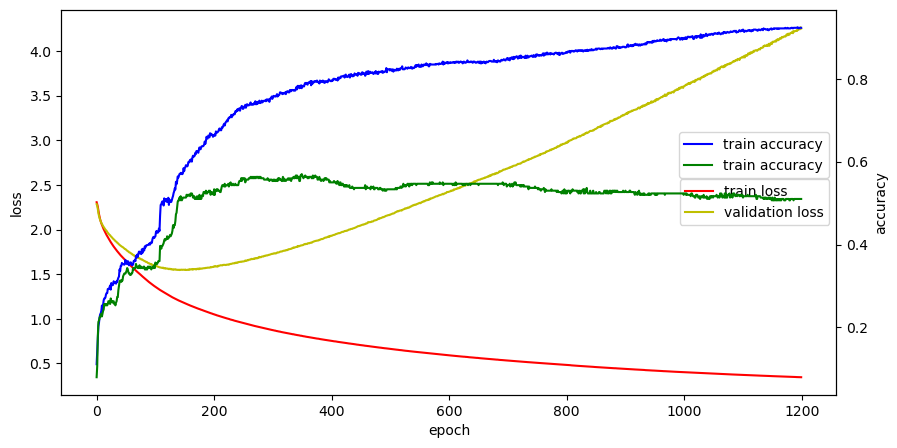

In [39]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수1

In [48]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback):  # on_epoch_end() : 각 epoch 종료 시 자동 호출됨
    def __init__(self):  # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch : {}, loss : {}, accuracy : {}, val_loss : {}, val_accuracy : {}'
                  .format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))

# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)

# 훈련셋(6만개) = 5만개 + 1만개(val)
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나누기)
# 두 번 실행 X
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

# 훈련셋(5만)과 검증셋(1만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)  # 0부터 500미만의 무작위 수 3개
val_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]


# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,  activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습 (콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                 validation_data=(X_val, Y_val),
                 verbose=0,
                 callbacks=[customHistory])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
epoch : 50, loss : 1.605617642402649, accuracy : 0.4300000071525574, val_loss : 1.6590027809143066, val_accuracy : 0.4333333373069763
epoch : 100, loss : 1.3851631879806519, accuracy : 0.5, val_loss : 1.5242836475372314, val_accuracy : 0.4633333384990692
epoch : 150, loss : 1.2467633485794067, accuracy : 0.5600000023841858, val_loss : 1.462345838546753, val_accuracy : 0.5
epoch : 200, loss : 1.1389154195785522, accuracy : 0.6128571629524231, va

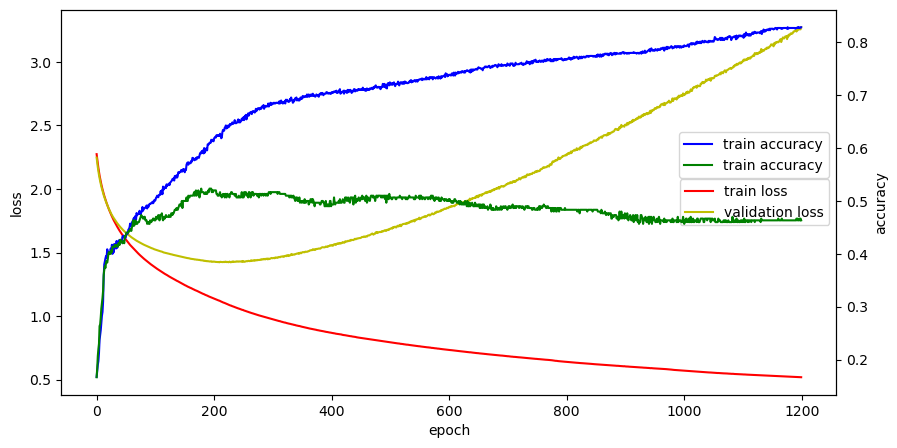

In [49]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수2 - Early Stopping(조기 종료)
 - val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [53]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습 (콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=2)  # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                 validation_data=(X_val, Y_val),
                 # verbose=0,
                 callbacks=[earlyStopping])

Epoch 1/1200
7/7 [==============================] - 1s 31ms/step - loss: 2.3123 - accuracy: 0.1486 - val_loss: 2.2814 - val_accuracy: 0.1367
Epoch 2/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2881 - accuracy: 0.1643 - val_loss: 2.2592 - val_accuracy: 0.1600
Epoch 3/1200
7/7 [==============================] - 0s 5ms/step - loss: 2.2642 - accuracy: 0.1700 - val_loss: 2.2379 - val_accuracy: 0.1633
Epoch 4/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2404 - accuracy: 0.1657 - val_loss: 2.2158 - val_accuracy: 0.1633
Epoch 5/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2168 - accuracy: 0.1757 - val_loss: 2.1959 - val_accuracy: 0.1533
Epoch 6/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1955 - accuracy: 0.1729 - val_loss: 2.1759 - val_accuracy: 0.1833
Epoch 7/1200
7/7 [==============================] - 0s 6ms/step - loss: 2.1741 - accuracy: 0.1843 - val_loss: 2.1575 - val_accuracy: 0.1900
Epoch 8/1200
7/7 [=

7/7 [==============================] - 0s 6ms/step - loss: 1.5822 - accuracy: 0.4800 - val_loss: 1.7374 - val_accuracy: 0.4133
Epoch 60/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5769 - accuracy: 0.4900 - val_loss: 1.7311 - val_accuracy: 0.4133
Epoch 61/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5700 - accuracy: 0.4914 - val_loss: 1.7295 - val_accuracy: 0.4167
Epoch 62/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5637 - accuracy: 0.4971 - val_loss: 1.7240 - val_accuracy: 0.4200
Epoch 63/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5581 - accuracy: 0.5029 - val_loss: 1.7207 - val_accuracy: 0.4300
Epoch 64/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5521 - accuracy: 0.5071 - val_loss: 1.7176 - val_accuracy: 0.4300
Epoch 65/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5464 - accuracy: 0.5114 - val_loss: 1.7128 - val_accuracy: 0.4333
Epoch 66/1200
7/7 [========

### 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보 (추가)
- 레이어 층 늘리기
- 활성화 함수 : 은닉층에 주로 relu계열 (elu ... )
- optimizer, epoch 등을 조정